<h1>Restaurants ratings in Portsmouth</h1>

This project involves Data cleansing, Exploration and visualization in Python.

<h3>1. Data Collection, Preparation and Processing</h3>

Dataset was obtained by web scrapping.

In [1]:
# Import package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

<h3>Import the datasets</h3>

In [2]:
# Import Data
df = pd.read_csv('./data/portsmouth_restaurants_google_maps_data.csv')
df_location = pd.read_csv('./data/portsmouth_restaurants_location.csv')


# df_location.info()
# df_location.describe()

<h3>Preview datasets</h3>

In [3]:
print('Preview Restaurant Data')
df.head()

Preview Restaurant Data


,name,rating,ratingCount,priceRanges,category,address,postcode,openingHours,phone,web,serviceInfo
0,Cocked Hat,4.0,2209.0,£10–20,Pub,"Privett Rd, Gosport PO12 3TR",PO12 3TR,NaN,023 9258 3422,greeneking.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa..."
1,Tap & Tandoor,4.7,579.0,NaN,Gastropub,"Gunwharf Rd, Portsmouth PO1 3TJ",PO1 3TJ,NaN,023 9381 3150,tapandtandoor.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa..."
2,Bella Calabria,4.4,919.0,£10–20,Italian restaurant,"45 London Rd, North End, Portsmouth PO2 0BH",PO2 0BH,"{""Sunday"":""12 - 10pm"",""Monday"":""12 - 10pm"",""Tu...",023 9269 4371,bellacalabriaportsmouth.com,"{""Accessibility"":""Wheelchair-accessible entran..."
3,Nice Tin Tin Chinese Restaurant,4.4,456.0,NaN,Chinese restaurant,"28 The Hard, Portsmouth PO1 3DT",PO1 3DT,"{""Sunday"":""12 - 10:30pm"",""Monday"":""12 - 10:30p...",023 9217 4590,nicetintin.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa..."
4,El Greco,4.7,288.0,£20–30,Greek restaurant,"8 Bellevue Terrace, Southsea, Portsmouth, Sou...",PO5 3AT,"{""Sunday"":""1:30 - 10pm"",""Monday"":""Closed"",""Tue...",07594 159161,elgrecoportsmouth.co.uk,"{""Service options"":""Takeaway, Dine-in, Deliver..."


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          117 non-null    object 
 1   rating        117 non-null    float64
 2   ratingCount   116 non-null    float64
 3   priceRanges   109 non-null    object 
 4   category      113 non-null    object 
 5   address       117 non-null    object 
 6   postcode      117 non-null    object 
 7   openingHours  95 non-null     object 
 8   phone         114 non-null    object 
 9   web           105 non-null    object 
 10  serviceInfo   117 non-null    object 
dtypes: float64(2), object(9)
memory usage: 10.2+ KB


,rating,ratingCount
count,117.000000,116.000000
mean,4.410256,764.698276
std,0.323873,729.954248
min,2.800000,2.000000
25%,4.300000,271.500000
50%,4.400000,548.500000
75%,4.600000,1047.750000
max,5.000000,4704.000000


In [5]:
print('Preview Restaurant Location Data')
df_location.head()

Preview Restaurant Location Data


,postcode,admin_county,admin_district,nuts,pfa,latitude,longitude,country
0,PO12 3TR,Hampshire,Gosport,Gosport,Hampshire,50.794883,-1.162522,England
1,PO1 3TJ,NaN,Portsmouth,Portsmouth,Hampshire,50.794328,-1.106968,England
2,PO2 0BH,NaN,Portsmouth,Portsmouth,Hampshire,50.814827,-1.079977,England
3,PO1 3DT,NaN,Portsmouth,Portsmouth,Hampshire,50.797996,-1.105920,England
4,PO5 3AT,NaN,Portsmouth,Portsmouth,Hampshire,50.789083,-1.096187,England


In [6]:
df_location.info()
df_location.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postcode        117 non-null    object 
 1   admin_county    1 non-null      object 
 2   admin_district  116 non-null    object 
 3   nuts            116 non-null    object 
 4   pfa             117 non-null    object 
 5   latitude        117 non-null    object 
 6   longitude       116 non-null    float64
 7   country         116 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.4+ KB


,longitude
count,116.000000
mean,-1.092655
std,0.013125
min,-1.162522
25%,-1.105185
50%,-1.091528
75%,-1.082569
max,-1.064810


<h3>Numbers of rows and columns in Restuarant Dataset</h3>

In [7]:

print(f"The number of rows in dataset is {df.shape[0]}")
print(f"The number of columns in dataset is {df.shape[1]}")


The number of rows in dataset is 117
The number of columns in dataset is 11


<h3>Check for duplicates rows and remove.</h3>

In [8]:
print(f"The number of duplicate restaurants is {df.duplicated(subset=['name', 'postcode']).sum()}")
df.drop_duplicates(subset=['name', 'postcode'], inplace=True)
print(f"The number of duplicate restaurants is {df.duplicated(subset=['name', 'postcode']).sum()}")

print(f"The number of duplicate restaurants postcode is {df_location.duplicated(subset=['postcode']).sum()}")
df_location.drop_duplicates(subset=['postcode'], inplace=True)
print(f"The number of duplicate restaurants  postcode is {df_location.duplicated(subset=['postcode']).sum()}")

The number of duplicate restaurants is 1
The number of duplicate restaurants is 0
The number of duplicate restaurants postcode is 32
The number of duplicate restaurants  postcode is 0


<h3>Check for missing values in restaurants dataset</h3>

In [9]:
print(f"Missing values in each restaurant column {df.isnull().sum()}")
print(" ")
print(f"Missing values in each restaurant location column {df_location.isnull().sum()}")

Missing values in each restaurant column name             0
rating           0
ratingCount      1
priceRanges      8
category         4
address          0
postcode         0
openingHours    22
phone            3
web             12
serviceInfo      0
dtype: int64
 
Missing values in each restaurant location column postcode           0
admin_county      84
admin_district     1
nuts               1
pfa                0
latitude           0
longitude          1
country            1
dtype: int64


<h3>Merge datasets</h3>

In [10]:
restaurants_df = df.merge(df_location, how='left', on='postcode' ) 
print(f"The number of rows in dataset is {restaurants_df.shape[0]}")
print(f"The number of columns in dataset is {restaurants_df.shape[1]}")
restaurants_df.head()

The number of rows in dataset is 116
The number of columns in dataset is 18


,name,rating,ratingCount,priceRanges,category,address,postcode,openingHours,phone,web,serviceInfo,admin_county,admin_district,nuts,pfa,latitude,longitude,country
0,Cocked Hat,4.0,2209.0,£10–20,Pub,"Privett Rd, Gosport PO12 3TR",PO12 3TR,NaN,023 9258 3422,greeneking.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa...",Hampshire,Gosport,Gosport,Hampshire,50.794883,-1.162522,England
1,Tap & Tandoor,4.7,579.0,NaN,Gastropub,"Gunwharf Rd, Portsmouth PO1 3TJ",PO1 3TJ,NaN,023 9381 3150,tapandtandoor.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa...",NaN,Portsmouth,Portsmouth,Hampshire,50.794328,-1.106968,England
2,Bella Calabria,4.4,919.0,£10–20,Italian restaurant,"45 London Rd, North End, Portsmouth PO2 0BH",PO2 0BH,"{""Sunday"":""12 - 10pm"",""Monday"":""12 - 10pm"",""Tu...",023 9269 4371,bellacalabriaportsmouth.com,"{""Accessibility"":""Wheelchair-accessible entran...",NaN,Portsmouth,Portsmouth,Hampshire,50.814827,-1.079977,England
3,Nice Tin Tin Chinese Restaurant,4.4,456.0,NaN,Chinese restaurant,"28 The Hard, Portsmouth PO1 3DT",PO1 3DT,"{""Sunday"":""12 - 10:30pm"",""Monday"":""12 - 10:30p...",023 9217 4590,nicetintin.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa...",NaN,Portsmouth,Portsmouth,Hampshire,50.797996,-1.105920,England
4,El Greco,4.7,288.0,£20–30,Greek restaurant,"8 Bellevue Terrace, Southsea, Portsmouth, Sou...",PO5 3AT,"{""Sunday"":""1:30 - 10pm"",""Monday"":""Closed"",""Tue...",07594 159161,elgrecoportsmouth.co.uk,"{""Service options"":""Takeaway, Dine-in, Deliver...",NaN,Portsmouth,Portsmouth,Hampshire,50.789083,-1.096187,England


<h3>Check for duplicates</h3>

In [11]:
restaurants_df.duplicated(subset=['name', 'postcode']).sum()

np.int64(0)

<h3>Check for missing values</h3> 

In [12]:
for col in restaurants_df.columns[restaurants_df.isnull().any()]:
    print(f'Column {col} has {restaurants_df[col].isnull().sum()} missing value')

Column ratingCount has 1 missing value
Column priceRanges has 8 missing value
Column category has 4 missing value
Column openingHours has 22 missing value
Column phone has 3 missing value
Column web has 12 missing value
Column admin_county has 115 missing value
Column admin_district has 1 missing value
Column nuts has 1 missing value
Column longitude has 1 missing value
Column country has 1 missing value


<h3>Handling missing values</h3>

In [13]:
# Handling of missing values will be done per analysis basis.
restaurants_df.fillna({'priceRanges': '0-0', 'phone': '000', 'web': 'no website', 'category': 'restaurant'}, inplace=True)
restaurants_df.drop(columns=['admin_county'], axis=1, inplace=True)

<h3>Clean column values</h3>

In [14]:
# Clean price range
def get_price_range(price_range):
  if '£' in price_range:
    return price_range.split('£')[1]
  else:
    return price_range

restaurants_df['priceRanges'] = restaurants_df['priceRanges'].apply(get_price_range)

def remove_non_ascii(address):
    return re.sub(r'[^\x00-\x7F]+', '', address)

# Remove non ascii characters:
restaurants_df['address'] = restaurants_df['address'].apply(remove_non_ascii)
restaurants_df['phone'] = restaurants_df['phone'].apply(remove_non_ascii)
restaurants_df['web'] = restaurants_df['web'].apply(remove_non_ascii)

restaurants_df.head(5)

,name,rating,ratingCount,priceRanges,category,address,postcode,openingHours,phone,web,serviceInfo,admin_district,nuts,pfa,latitude,longitude,country
0,Cocked Hat,4.0,2209.0,10–20,Pub,"Privett Rd, Gosport PO12 3TR",PO12 3TR,NaN,023 9258 3422,greeneking.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa...",Gosport,Gosport,Hampshire,50.794883,-1.162522,England
1,Tap & Tandoor,4.7,579.0,0-0,Gastropub,"Gunwharf Rd, Portsmouth PO1 3TJ",PO1 3TJ,NaN,023 9381 3150,tapandtandoor.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa...",Portsmouth,Portsmouth,Hampshire,50.794328,-1.106968,England
2,Bella Calabria,4.4,919.0,10–20,Italian restaurant,"45 London Rd, North End, Portsmouth PO2 0BH",PO2 0BH,"{""Sunday"":""12 - 10pm"",""Monday"":""12 - 10pm"",""Tu...",023 9269 4371,bellacalabriaportsmouth.com,"{""Accessibility"":""Wheelchair-accessible entran...",Portsmouth,Portsmouth,Hampshire,50.814827,-1.079977,England
3,Nice Tin Tin Chinese Restaurant,4.4,456.0,0-0,Chinese restaurant,"28 The Hard, Portsmouth PO1 3DT",PO1 3DT,"{""Sunday"":""12 - 10:30pm"",""Monday"":""12 - 10:30p...",023 9217 4590,nicetintin.co.uk,"{""Accessibility"":""Wheelchair-accessible car pa...",Portsmouth,Portsmouth,Hampshire,50.797996,-1.105920,England
4,El Greco,4.7,288.0,20–30,Greek restaurant,"8 Bellevue Terrace, Southsea, Portsmouth, Sout...",PO5 3AT,"{""Sunday"":""1:30 - 10pm"",""Monday"":""Closed"",""Tue...",07594 159161,elgrecoportsmouth.co.uk,"{""Service options"":""Takeaway, Dine-in, Deliver...",Portsmouth,Portsmouth,Hampshire,50.789083,-1.096187,England


<h2>2. Data Analysis</h2>

<h3>2.1 Distribution of Postcode in Portsmouth</h3>

In [15]:
postcode_df = restaurants_df.copy()

def get_first_line_of_postcode(code):
    if code is not None:
        return code.split(' ')[0]
    else:
        return code

postcode_df['outward_code'] = postcode_df['postcode'].apply(get_first_line_of_postcode)
print('Distribution of Postcode')
print(postcode_df['outward_code'].value_counts())

Distribution of Postcode
outward_code
PO1     51
PO5     39
PO2     10
PO6      7
PO4      6
PO3      2
PO12     1
Name: count, dtype: int64


P01 has the highest number of restaurants at 51.
P012 has the lowest number of restaurants at 1.


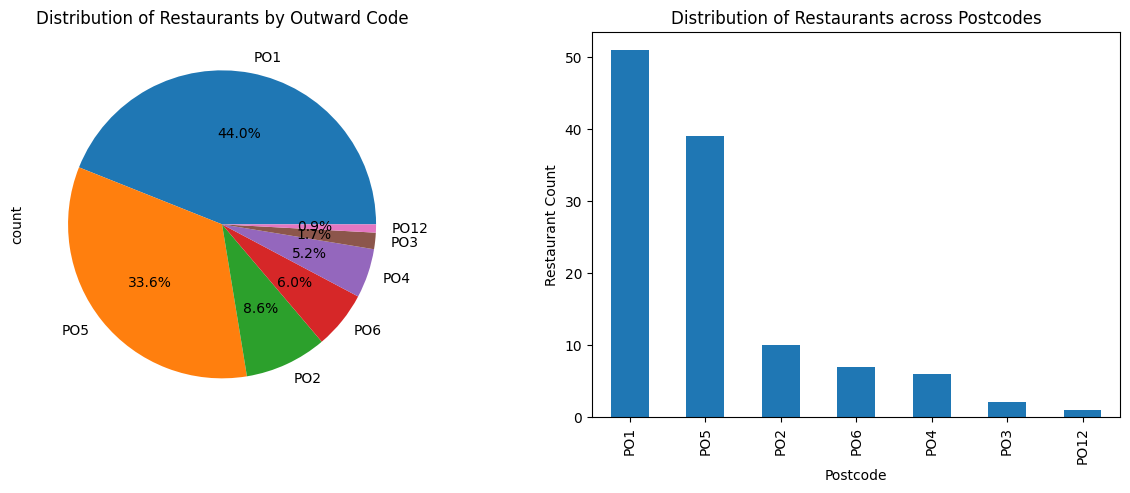

In [16]:
plt.figure(figsize=(15, 5))
postcode_restaurant_count = postcode_df['outward_code'].value_counts()

plt.subplot(1, 2, 1)
postcode_restaurant_count.plot(kind='pie', autopct='%1.1f%%') 
plt.title('Distribution of Restaurants by Outward Code')

plt.subplot(1, 2, 2)
postcode_restaurant_count.plot(kind='bar')
plt.xlabel('Postcode')
plt.ylabel('Restaurant Count')
plt.title('Distribution of Restaurants across Postcodes')

print('P01 has the highest number of restaurants at 51.')
print('P012 has the lowest number of restaurants at 1.')

In [17]:
print(f'Data type of restaurant type is {postcode_df['category'].dtype}')
cuisine_distribution = postcode_df['category'].value_counts()
print('Distribution of cuisine')
print(cuisine_distribution)

Data type of restaurant type is object
Distribution of cuisine
category
Restaurant                   30
Pub                           7
Italian restaurant            6
Chinese restaurant            5
restaurant                    4
Hamburger restaurant          4
Turkish restaurant            4
Cafe                          3
Vietnamese restaurant         3
Gastropub                     2
Thai restaurant               2
Japanese restaurant           2
Portuguese restaurant         2
Fish and chips takeaway       2
Kebab Shop                    2
Cocktail bar                  2
Pizza restaurant              2
Greek restaurant              2
Family restaurant             1
Brazilian restaurant          1
Tex-Mex restaurant            1
Tapas bar                     1
Bistro                        1
Vegan restaurant              1
African restaurant            1
Modern British restaurant     1
Pizza Takeaway                1
Filipino restaurant           1
Belgian restaurant            1


In [18]:
def categorize_restaurants(restaurant_type):
    if ('bar' in restaurant_type.lower()) or ('pub' in restaurant_type.lower()):
        return 'pub'
    elif ('takeaway' in restaurant_type.lower()):
        return 'takeaway'
    elif ('delivery' in restaurant_type.lower()):
        return 'delivery'
    elif ('restaurant' in restaurant_type.lower()):
        return 'restaurant'         
    else:
        return 'others'
    

postcode_df['category_by_primary_service'] = postcode_df['category'].apply(categorize_restaurants)

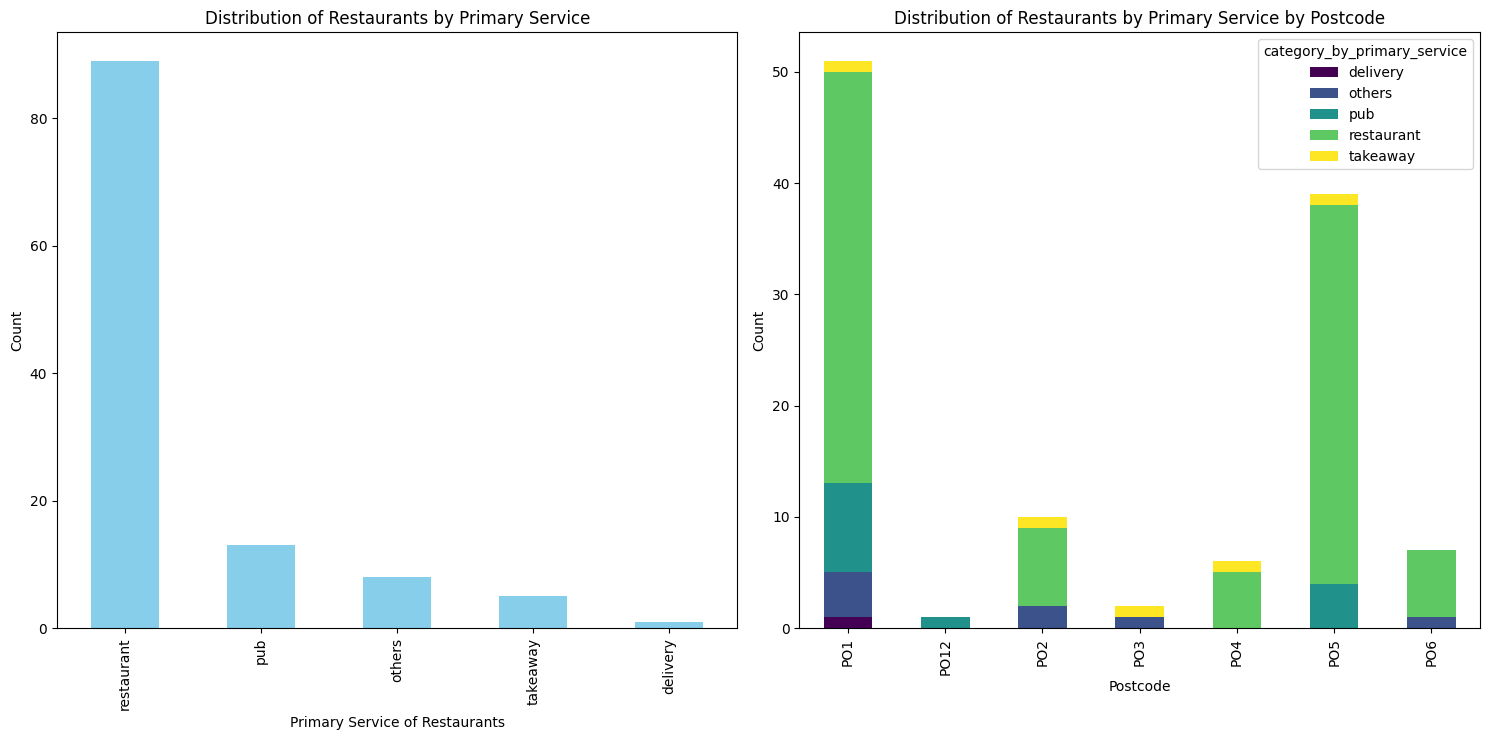

In [19]:
category_by_primary_service = postcode_df['category_by_primary_service'].value_counts()
category_by_primary_service_per_postcode = postcode_df.groupby(['outward_code', 'category_by_primary_service']).size().unstack()

plt.figure(figsize=(15, 7.5))

ax1 = plt.subplot(1, 2, 1)
category_by_primary_service.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_xlabel('Primary Service of Restaurants')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Restaurants by Primary Service')

ax2 = plt.subplot(1, 2, 2)
category_by_primary_service_per_postcode.plot(kind='bar', stacked=True, ax=ax2, colormap='viridis')
ax2.set_xlabel('Postcode')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Restaurants by Primary Service by Postcode')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Distribution of 10 least common Cuisines')

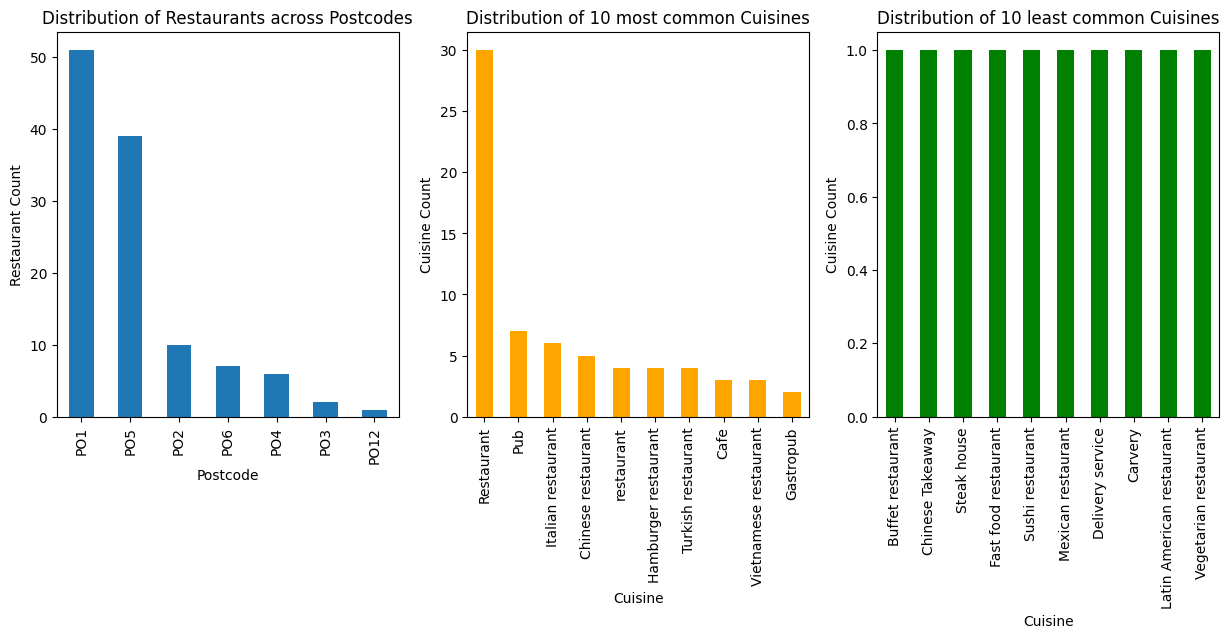

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
postcode_df['outward_code'].value_counts().plot(kind='bar')
plt.xlabel('Postcode')
plt.ylabel('Restaurant Count')
plt.title('Distribution of Restaurants across Postcodes')

plt.subplot(1, 3, 2)
cuisine_distribution.head(10).plot(kind='bar', color='orange')
plt.xlabel('Cuisine')
plt.ylabel('Cuisine Count')
plt.title('Distribution of 10 most common Cuisines')

plt.subplot(1, 3, 3)
cuisine_distribution.tail(10).plot(kind='bar', color='green')
plt.xlabel('Cuisine')
plt.ylabel('Cuisine Count')
plt.title('Distribution of 10 least common Cuisines')

<h3>2.2 Geolocation of Restaurant in Portsmouth</h3>

In [21]:
postcode_df = postcode_df.dropna(subset=['latitude', 'longitude'])
location_correlation = postcode_df[['rating', 'latitude', 'longitude']].corr()

In [22]:
location_data = postcode_df[['name', 'rating', 'address', 'latitude', 'longitude']]
location_data

m = folium.Map([50.79643851477156, -1.1058239725553403], zoom_start=12)

for loc in location_data.iterrows():
    folium.Marker(
        location=[loc[1]['latitude'], loc[1]['longitude']],
        tooltip="Click me!",
        popup=f"<div style='width: 200px;'>{loc[1]['name']}<br>{loc[1]['rating']} rating<br>{loc[1]['address']}</div>",
        icon=folium.Icon(icon="cloud"),
    ).add_to(m)

print('Visualizing the locations of restaurants in Portmouths on a map')
m

Visualizing the locations of restaurants in Portmouths on a map


<Axes: >

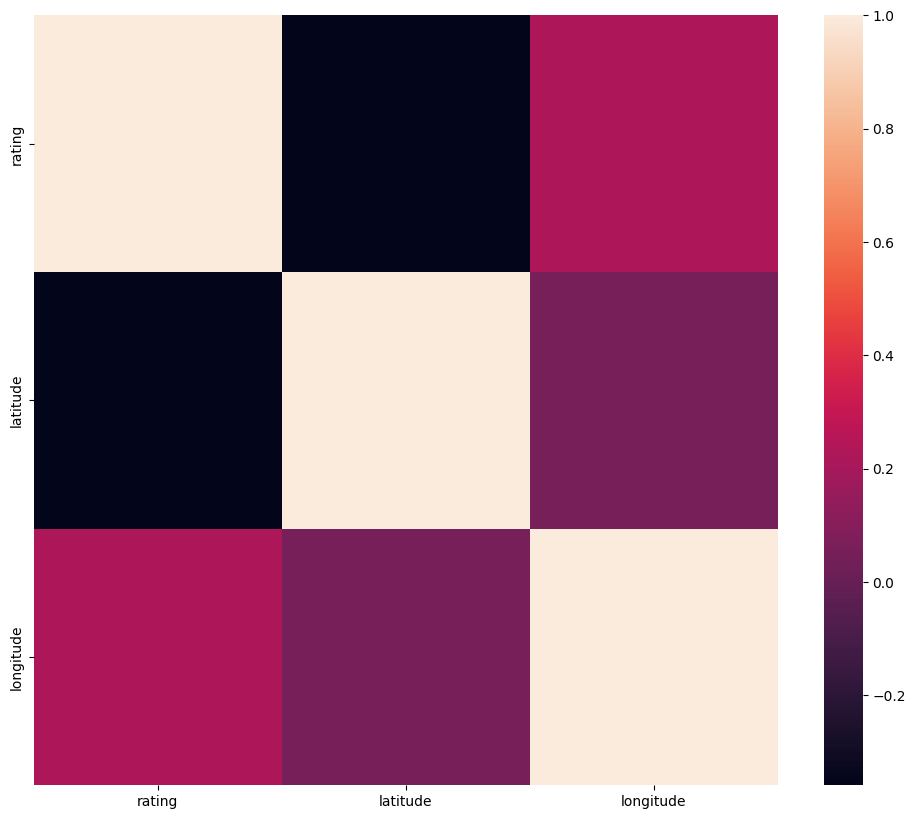

In [23]:
# Print Correlation between rating and location
plt.figure(figsize=(12, 10))
sns.heatmap(location_correlation)

# No correlation between ration and geolocation

<h3>2.3 Distribution of Ratings</h3>

Data type of restaurant ratings is float64.
The highest frequency rating for restaurants is 4.6.


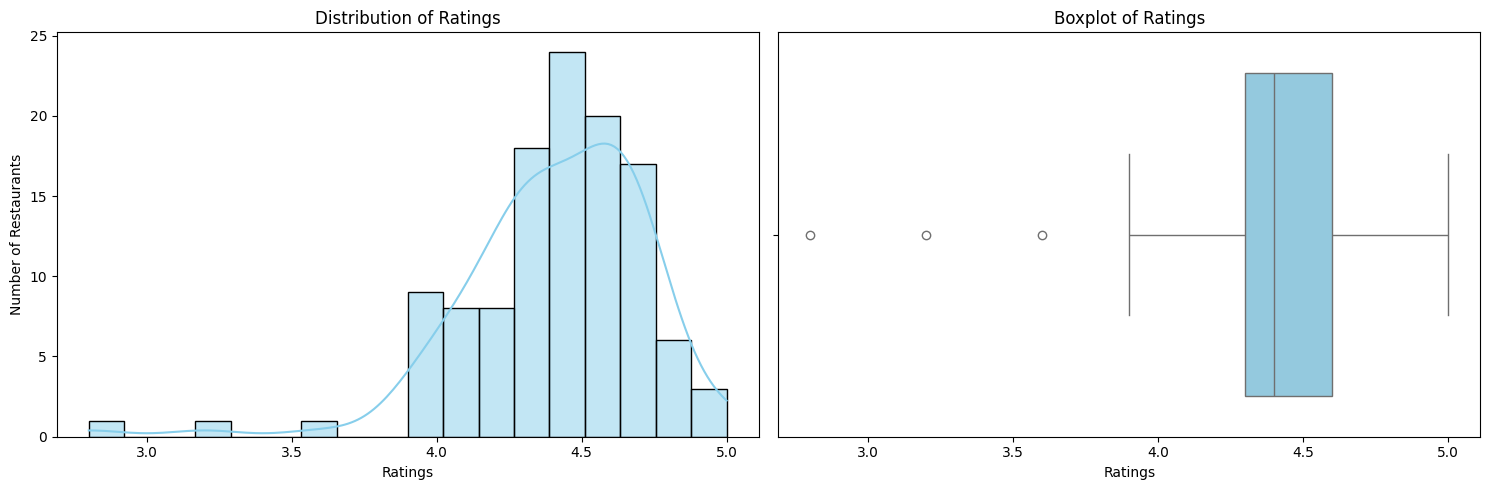

In [24]:
rating_df = restaurants_df.copy()
print(f'Data type of restaurant ratings is {rating_df['rating'].dtype}.')
ratings_count = rating_df['rating'].value_counts()

print(f'The highest frequency rating for restaurants is {rating_df['rating'].mode()[0]}.')

# Prepare the distribution data
income_distribution_df = ratings_count.reset_index()
income_distribution_df.columns = ['Rating', 'Count']

# Create side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot 1: Distribution of Ratings
sns.histplot(rating_df['rating'], color='skyblue', kde=True, ax=axes[0])
axes[0].set_title("Distribution of Ratings")
axes[0].set_xlabel("Ratings")
axes[0].set_ylabel("Number of Restaurants")

# Plot 2: Boxplot of Ratings
sns.boxplot(x=rating_df['rating'], color='skyblue',  ax=axes[1])
axes[1].set_title("Boxplot of Ratings")
axes[1].set_xlabel("Ratings")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [25]:
print('Summary statistics of rating')
print(rating_df['rating'].describe())

Summary statistics of rating
count    116.000000
mean       4.408621
std        0.324793
min        2.800000
25%        4.300000
50%        4.400000
75%        4.600000
max        5.000000
Name: rating, dtype: float64


<h3>2.4 Distribution of Price Range</h3>

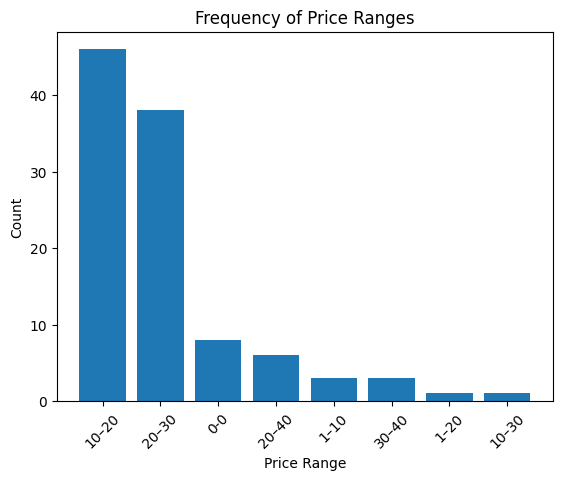

In [26]:
postcode_df['priceRanges'] = postcode_df['priceRanges'].astype(str)
postcode_df_filter = postcode_df[~(postcode_df['priceRanges'].str.lower().isin(['nan', 'moderate', 'expensive']))]

# Count occurrences of each price range
price_range_counts = postcode_df_filter['priceRanges'].value_counts()

# Assuming 'df' contains price_range and count data for the plot
plt.bar(price_range_counts.index, price_range_counts.values)  

# Customize the plot
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Frequency of Price Ranges')
plt.xticks(rotation=45)
plt.show()


In [27]:
average_rating_per_price_range = postcode_df_filter.groupby('priceRanges')['rating'].agg(['mean', 'min', 'max', 'count'])
average_rating_per_price_range

,mean,min,max,count
priceRanges,,,,
0-0,4.412500,3.2,5.0,8
10–20,4.386957,2.8,5.0,46
10–30,3.900000,3.9,3.9,1
1–10,4.333333,4.1,4.6,3
1–20,4.500000,4.5,4.5,1
20–30,4.423684,3.6,4.8,38
20–40,4.600000,4.4,4.7,6
30–40,4.433333,4.2,4.8,3


In [28]:
most_popular_based_on_ratingCount = postcode_df_filter.groupby('category')['ratingCount'].agg(['size', 'min', 'max', 'mean', 'sum']).sort_values(by='sum', ascending=False)
most_popular_based_on_ratingCount


,size,min,max,mean,sum
category,,,,,
Restaurant,27,14.0,2392.0,743.703704,20080.0
Pub,7,772.0,2803.0,1567.000000,10969.0
Italian restaurant,6,214.0,2117.0,788.666667,4732.0
Carvery,1,4704.0,4704.0,4704.000000,4704.0
Vietnamese restaurant,3,501.0,1782.0,931.666667,2795.0
Brazilian restaurant,1,2754.0,2754.0,2754.000000,2754.0
Hamburger restaurant,3,229.0,1592.0,796.333333,2389.0
Mexican restaurant,1,2273.0,2273.0,2273.000000,2273.0
Turkish restaurant,4,410.0,788.0,555.000000,2220.0


<h3>3 Summary of the Analysis</h3>

### **3.1. Distribution of Postcodes in Portsmouth**

1. **Distribution by Outward Code (Pie Chart)**  
   The pie chart shows the distribution of dining establishments across Portsmouth's postal areas. **PO1** accounts for 44% and **PO5** for 33.6% of the total, making these the most restaurant-dense areas and key central hubs. Other areas, including **PO2**, **PO4**, **PO6**, **PO3**, and **PO12**, have significantly smaller shares, ranging from 0.9% to 8.6%.  
   *Note*: The term "restaurants" is used broadly to include various types of dining services categorized by outward code.

2. **Count of Restaurants by Postcode (Bar Chart)**  
   The bar chart reinforces that **PO1** and **PO5** have the highest counts of dining establishments, while **PO3** and **PO12** have the fewest. This further confirms the centrality of **PO1** and **PO5** as primary dining hotspots.  

3. **Primary Service Distribution (Bar Chart)**  
   Restaurants dominate as the leading service type, with over 80 establishments, far surpassing the secondary categories such as pubs and others, which range between 15 and 20 establishments each. Delivery services are sparsely represented, suggesting that the local market strongly favors dine-in experiences over delivery or takeaway services.  

4. **Primary Service by Postcode (Bar Chart)**  
   **PO1** and **PO5** host the highest variety and number of services, with restaurants being the predominant category. Pubs and other service types contribute meaningfully in these areas but are sparse in postcodes like **PO3** and **PO12**, where fewer dining establishments and limited service diversity are observed.

---

### **3.2. Geolocation of Restaurants in Portsmouth**

1. **Geolocation Map**  
   The geolocation map reveals a dense clustering of dining establishments in the southern and southwestern parts of Portsmouth, aligning with the **PO1** and **PO5** regions. This geographic pattern corresponds closely with the postal code distribution charts, confirming these areas as dining and activity hubs.  

2. **Correlation Heatmap**  
   - **Weak Correlation with Ratings**: The heatmap reveals a negligible or weak correlation between ratings and geographic location (latitude or longitude). This indicates that restaurant quality, as perceived through ratings, is not significantly influenced by geographic factors, reaffirming that other attributes, such as service quality or cuisine, might play a more critical role.

---

### **3.3. Distribution of Ratings**

1. **Rating Histogram (Left Panel)**  
   The histogram shows that most restaurants have ratings clustered between **4.0 and 4.5**, with a peak around **4.5**. The slight left skew suggests high ratings are the norm, with very few establishments receiving scores below **4.0**.  

2. **Rating Boxplot (Right Panel)**  
   The boxplot confirms a median rating close to **4.5**, with an interquartile range (IQR) between **4.0 and 4.5**. Outliers below **4.0** are minimal, indicating a high degree of consistency in customer satisfaction across restaurants in Portsmouth.  

---

### **3.4. Distribution of Price Ranges**

1. **Price Range Frequency (Bar Chart)**  
   The "10-20" and "20-30" price ranges dominate, reflecting a strong customer preference for mid-range dining options. Lower price ranges ("0-10") and higher ranges ("30-40") are less common, suggesting limited demand for extreme budget or premium dining experiences.  

---

### **Summary of Visualizations**

1. **Distribution by Service Type and Postcode**  
   - Restaurants dominate across all postcodes, especially in **PO1** and **PO5**, which are primary dining hubs.  
   - Other service types, like pubs and others, are present in smaller numbers and are less evenly distributed. Delivery services remain minimal across all areas.  

2. **Geographic Trends**  
   - Dining establishments are heavily clustered in the southern and southwestern parts of Portsmouth, aligning with **PO1** and **PO5**.  
   - Customer ratings are generally high and consistent, with little geographic variation, highlighting quality dining experiences irrespective of location.  

3. **Customer Preferences**  
   - Restaurants are the clear preference among service types, with ratings concentrated between **4.0 and 4.5**.  
   - Mid-range pricing ("10-30") is the most common, catering to a broad audience, while niche or premium pricing categories are less represented.

4. **Cuisines and Niche Offerings**  
   - The top 10 cuisines, such as Italian and Chinese, dominate, while niche offerings like vegetarian or buffet restaurants are rare, indicating potential gaps in the market.

---

### **Key Insights**

1. **Central Dining Hubs:**  
   **PO1** and **PO5** are the epicenters of restaurant activity, offering the greatest variety and number of dining establishments. Businesses looking to capitalize on foot traffic and customer demand should prioritize these areas.  

2. **Dominance of Restaurants:**  
   Traditional dine-in restaurants significantly outnumber all other service types, reflecting a strong preference for sit-down dining over takeaway or delivery services.  

3. **High Customer Satisfaction:**  
   The majority of establishments achieve ratings above **4.0**, with a median close to **4.5**, suggesting consistently high service quality across the city.  

4. **Pricing Alignment:**  
   The dominance of mid-range price options ("10-30") indicates affordability is a key consideration for customers, while demand for budget or luxury dining is limited.  

5. **Limited Diversity in Services and Cuisines:**  
   Niche categories like delivery services and less common cuisines, such as vegetarian or buffet restaurants, are underrepresented, suggesting an opportunity to address untapped market segments.

6. **Independent Ratings:**  
   The lack of correlation between ratings and location suggests that restaurant quality is distributed evenly across different areas and does not necessarily depend on proximity to the central hubs.

---

### **Conclusion**

The analysis reveals that **PO1** and **PO5** serve as Portsmouth's primary dining hubs, hosting the majority of establishments and showcasing diverse services and cuisines. Restaurants dominate as the preferred service type, supported by consistently high customer ratings and a focus on mid-range pricing. While the market caters well to mainstream preferences, opportunities exist to introduce niche cuisines and expand services like delivery, especially in underrepresented areas like **PO3** and **PO12**.  

**Recommendations:**  
- Businesses should target **PO1** and **PO5** for expansion while maintaining mid-range pricing and high-quality service.  
- Entrepreneurs might consider filling gaps in niche services, such as delivery and vegetarian options, to capture underserved customer segments.

